In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start='2014-01-01'
end='2024-12-12'
stock='GOOG'

data=yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2024-12-05,173.914322,177.306613,173.615000,176.917499,16145500
2024-12-06,176.089401,176.437608,173.156072,173.485325,13319500


In [5]:
data.reset_index(inplace=True)

In [7]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
1,2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2,2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
3,2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
4,2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218


In [8]:
ma_100_days=data.Close.rolling(100).mean()

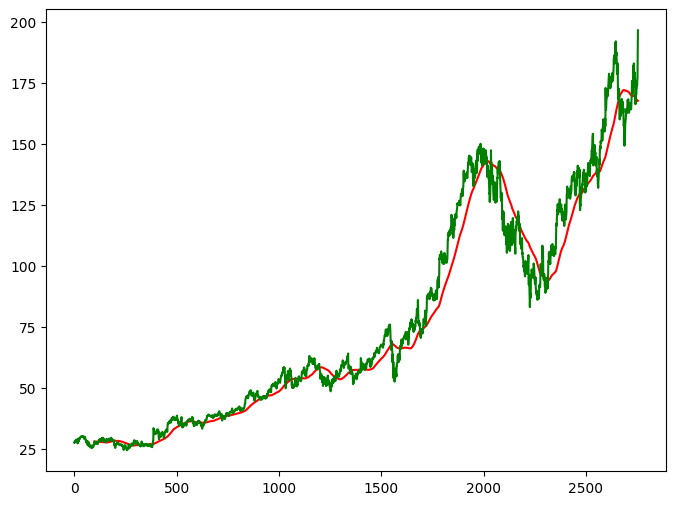

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
ma_200_days=data.Close.rolling(200).mean()

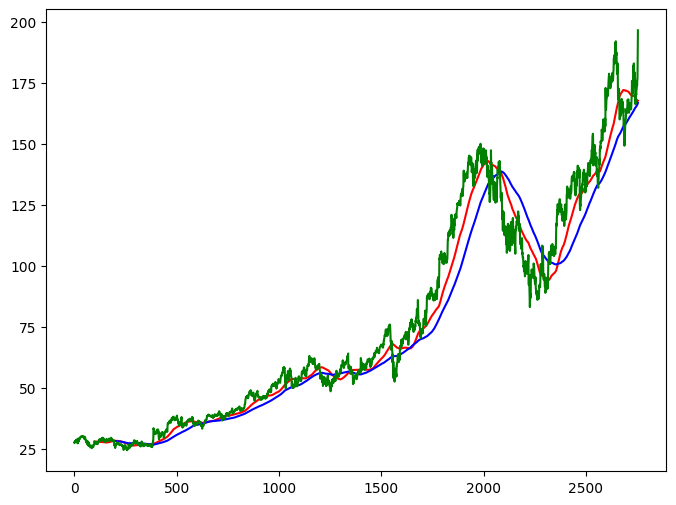

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [15]:
data_train.shape[0]

2204

In [16]:
data_test.shape[0]

551

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale=scaler.fit_transform(data_train)

In [19]:
x=[]
y=[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
x,y=np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

66/66 [==============================] - 9s 81ms/step - loss: 0.0264
Epoch 2/50
66/66 [==============================] - 5s 81ms/step - loss: 0.0074
Epoch 3/50
66/66 [==============================] - 5s 81ms/step - loss: 0.0060
Epoch 4/50
66/66 [==============================] - 5s 83ms/step - loss: 0.0047
Epoch 5/50
66/66 [==============================] - 5s 81ms/step - loss: 0.0052
Epoch 6/50
66/66 [==============================] - 5s 80ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 5s 79ms/step - loss: 0.0044
Epoch 8/50
66/66 [==============================] - 6s 89ms/step - loss: 0.0045
Epoch 9/50
66/66 [==============================] - 6s 89ms/step - loss: 0.0043
Epoch 10/50
66/66 [==============================] - 6s 84ms/step - loss: 0.0042
Epoch 11/50
66/66 [==============================] - 6s 84ms/step - loss: 0.0039
Epoch 12/50
66/66 [==============================] - 6s 83ms/step - loss: 0.0035
Epoch 13/50
66/66 [=================

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
pas_100_days=data_train.tail(100)

In [28]:
data_test=pd.concat([pas_100_days, data_test], ignore_index=True)

In [29]:
data_test_scale=scaler.fit_transform(data_test)

In [30]:
x=[]
y=[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [31]:
x,y=np.array(x), np.array(y)

In [32]:
y_predict=model.predict(x)

18/18 [==============================] - 1s 26ms/step


In [37]:
scale=1/scaler.scale_

In [38]:
y_predict=y_predict*scale

In [39]:
y=y*scale

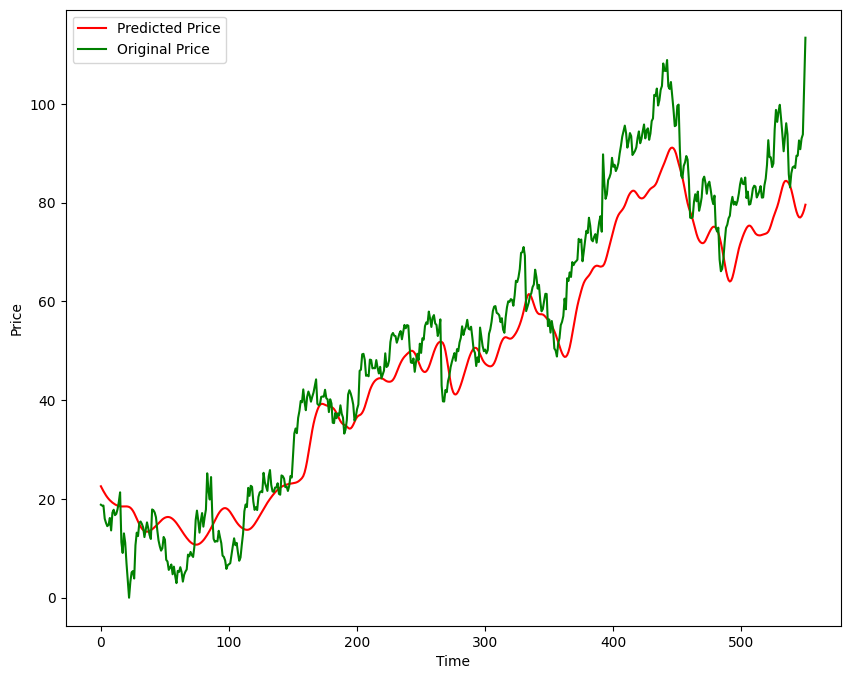

In [41]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [42]:
model.save('Stock Prediction Model.keras')